author: sako, yorazaye

In [0]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [0]:
# 1.1. Create a matrix of random values of a distribution of your choice.
np.random.rand(7,9)

array([[0.73684763, 0.59751637, 0.12819637, 0.6898165 , 0.45250698,
        0.72770088, 0.16178895, 0.29732111, 0.90093569],
       [0.64808872, 0.6054681 , 0.34545769, 0.16382482, 0.88724091,
        0.94080394, 0.18340494, 0.49853517, 0.32823898],
       [0.15367354, 0.79967399, 0.7105545 , 0.15686314, 0.5500414 ,
        0.09030301, 0.71025824, 0.32245315, 0.11313695],
       [0.38366844, 0.2877825 , 0.87220068, 0.01370571, 0.12280123,
        0.88610333, 0.42433331, 0.70903906, 0.59486066],
       [0.95985434, 0.19125478, 0.52675019, 0.67254526, 0.14151433,
        0.09857227, 0.20958264, 0.06059893, 0.98791278],
       [0.805779  , 0.57469124, 0.55170816, 0.7835074 , 0.81101555,
        0.99262404, 0.50268419, 0.76955142, 0.98835611],
       [0.6213953 , 0.27147346, 0.96483074, 0.92486136, 0.59958218,
        0.00322262, 0.50271748, 0.10957943, 0.55139054]])

In [0]:
# 1.2. Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x = x.reshape(4, 3)
print(x)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [0]:
# 1.3. Write a function that creates an incremental array of dimension (1,n) with valuesbetween 0 and 1. Usearr.shapeto verify.
def ft_inc_arr(n):
  y = np.arange(0, 1, 1/n)
  return (y)

arr = ft_inc_arr(3)
arr.shape

(3,)

In [0]:
# 1.4. Generate a 10x12 array and extract row 0-4 of columns 8-12.

x = np.random.rand(10, 12)
# ndArray[row_index, column_index]
x[0:4, 7:12]

array([[0.75955157, 0.15216195, 0.68323023, 0.15061788, 0.81605752],
       [0.98956193, 0.78967614, 0.62987728, 0.09980975, 0.82343695],
       [0.69362487, 0.03580844, 0.92224432, 0.33965035, 0.52457665],
       [0.28636236, 0.5515988 , 0.11423076, 0.86943658, 0.7411237 ]])

(6, 7)


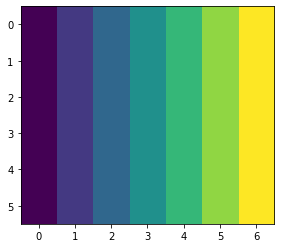

In [0]:
# 1.5. Using the function in Q3, get m vectors and bind them together (to have a m x n)matrix. Plot the matrix with matplotlib’simshow.

def ft_gradient_right(m, n):
  i = 0
  x = np.zeros((m, n))
  while (i < m):
    j = 0
    y = ft_inc_arr(n)
    while (j < n):
      x[i, j] += y[j]
      j += 1
    i += 1
  return (x)
x = ft_gradient_right(6, 7)
print(x.shape)
plt.imshow(x)

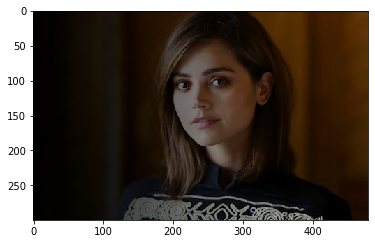

In [0]:
# 1.6. Multiply the resulting matrix from Q5 with the matrix of a picture of your choice.Plot the resulting matrix.
i = mpimg.imread("/content/coleman.jpg") #puppy-dog.jpg")
x = ft_gradient_right(i.shape[0], i.shape[1])
f = np.empty((i.shape[0], i.shape[1], i.shape[2]))
# Red matrix multiplication
f = np.multiply(x, i[:, :, 0])
# Green matrix multiplication
f = np.dstack((f, np.multiply(x, i[:, :, 1])))
# Blue matrix multiplication
f = np.dstack((f, np.multiply(x, i[:, :, 2])))
plt.imshow(np.uint64(f))

In [0]:
# Part 2. Filters. Image processing / processing.

In [0]:
def pltimg(img, title="Not filtered", h=15, **kwargs):
  y = img.shape[0]
  x = img.shape[1]
  w = (y/x) * h
  plt.figure(figsize=(w,h))
  plt.title(title)
  plt.imshow(img, interpolation="none", vmin=0,vmax=1, **kwargs)
  plt.axis('off')
  plt.show()

In [0]:
def apply_filter(img, filt):
  img += filt
  return (filt)

In [0]:
def channel_split(img):
  return (img[:,:,0], img[:,:,1], img[:,:,2])

In [0]:
def channel_stack(r,g,b):
  return(np.stack([r,g,b], axis=2))

In [0]:
def channel_filter(chl, val):
    true_shape = chl.shape
    chl_arr = chl.flatten()
    ret = np.interp(
        chl_arr,
        np.linspace(0,1,len(val)),
        val)
    return (ret.reshape(true_shape))

In [0]:
def reset_bin(filt):
  if (filt[:, :] > 1):
    filt[:, :] = 1
  if (filt[:, :] < 0):
    filt[:, :] = 1
  return (filt)

In [0]:
def alpha_beta(image, alpha, beta):
  rp = np.copy(image)
  rp = np.clip((alpha * rp + beta), 0, 255)
  return (np.clip(rp, 0, 1))

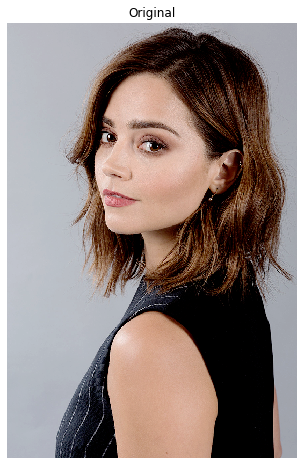

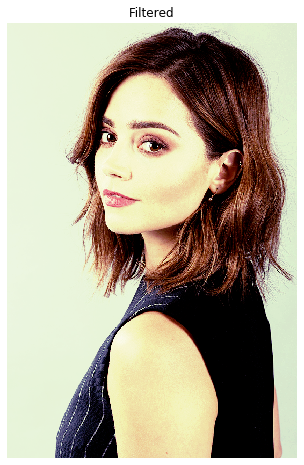

In [0]:
image = mpimg.imread("/content/coleman.png")
#image = mpimg.imread("/content/coleman.jpg")
pltimg(image, "Original", 8)
r, g, b = channel_split(image)
r_f = channel_filter(r,[0,0.4,0.9,1])
g_f = channel_filter(g,[0,0.35,0.95,1])
b_f = channel_filter(b,[0,0.45,0.8,1])
ug = channel_stack(r_f,g_f,b_f)
pltimg(ug, "Filtered", 8)

In [0]:
def get_pixel(img, i, j):
  rows, cols, cl = img.shape
  if (i >= rows or j >= cols):
    return (None)
  else:
    pixel = img[i, j, :]
    return (pixel)

def first_filter(img, r, g, b):
  rp, gp, bp = channel_split(img)
  rf = np.empty((img.shape[0], img.shape[1]))
  gf = np.empty((img.shape[0], img.shape[1]))
  bf = np.empty((img.shape[0], img.shape[1]))
  rf = rp * r
  gf = gp * g
  bf = bp * b
  res = channel_stack(rf, gf, bf)
  return (np.clip(res, 0, 1))

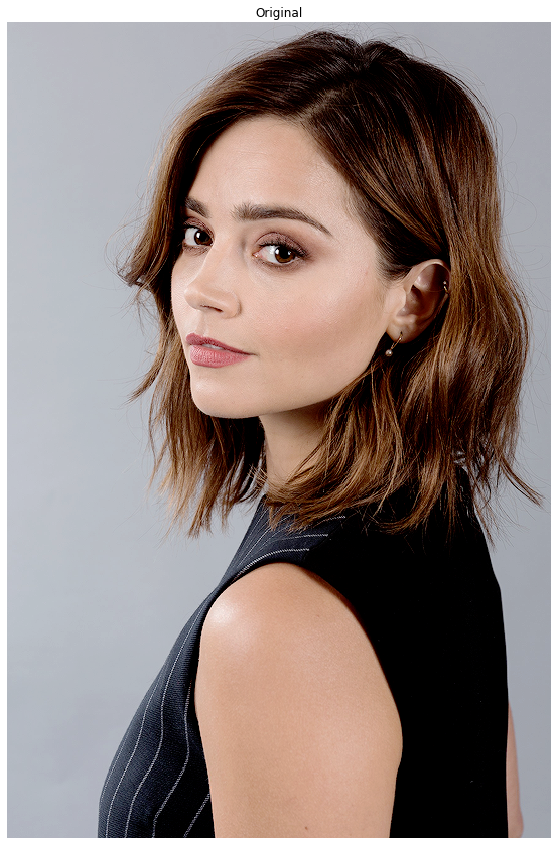

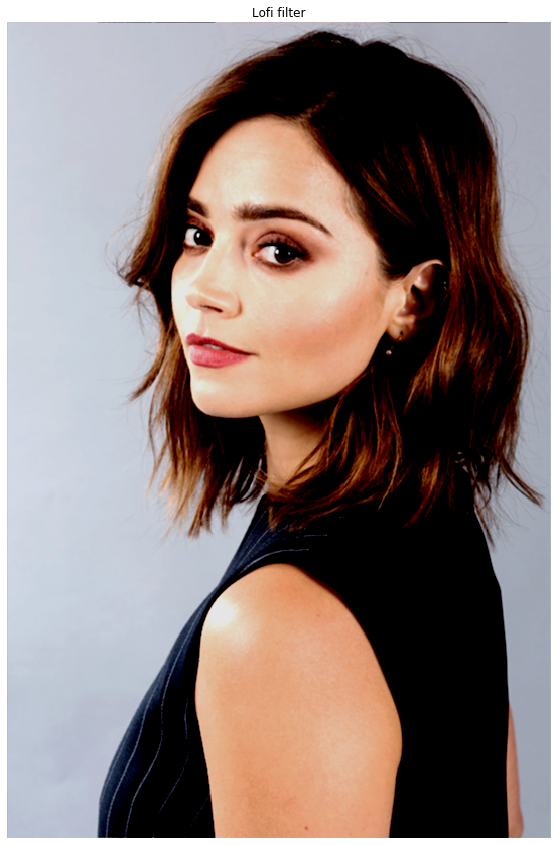

In [0]:
def blur_effec(img):
    cm = np.array([[1.0,2.0,1.0], [2.0,4.0,2.0], [1.0,2.0,1.0]])
    cm = cm / np.sum(cm)
    res = []
    for y in range(3):
        tmp = np.copy(img)
        tmp = np.roll(tmp, y - 1, axis=0)
        for x in range(3):
            tmpX = np.copy(tmp)
            tmpX = np.roll(tmpX, x - 1, axis=1)*cm[y,x]
            res.append(tmpX)

    res = np.array(res)
    rimg = np.sum(res, axis=0)
    return rimg

def hudson_filter(img):
  tmp1 = first_filter(img, 1.1, 1, 1.11)
  tmp2 = alpha_beta(tmp1, 1, 0.03)
  return (tmp2)

def rise_filter(img):
  tmp1 = first_filter(img, 1.26, 1.12, 1.001)
  tmp2 = alpha_beta(tmp1, 0.87, 0.01)
  return (tmp2)

def lo_fi_filter(img):
  tmp0 = blur(img)
  tmp1 = first_filter(tmp0, 1.25, 1.25, 1.25)
  tmp2 = alpha_beta(tmp1, 1.3, -0.4)
  return (tmp2)

cole = lo_fi_filter(img)
pltimg(img, "Original")
pltimg(cole, "Lofi filter")

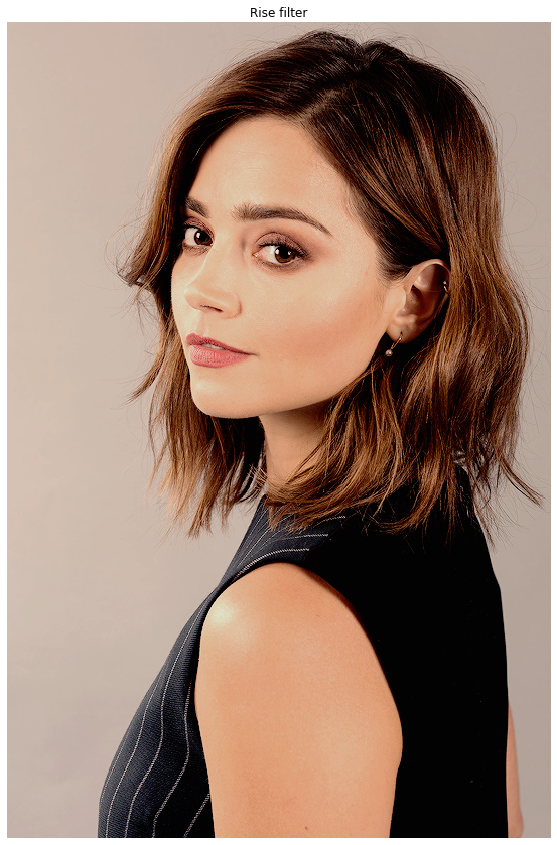

In [0]:
cole = rise_filter(img)
pltimg(cole, "Rise filter")

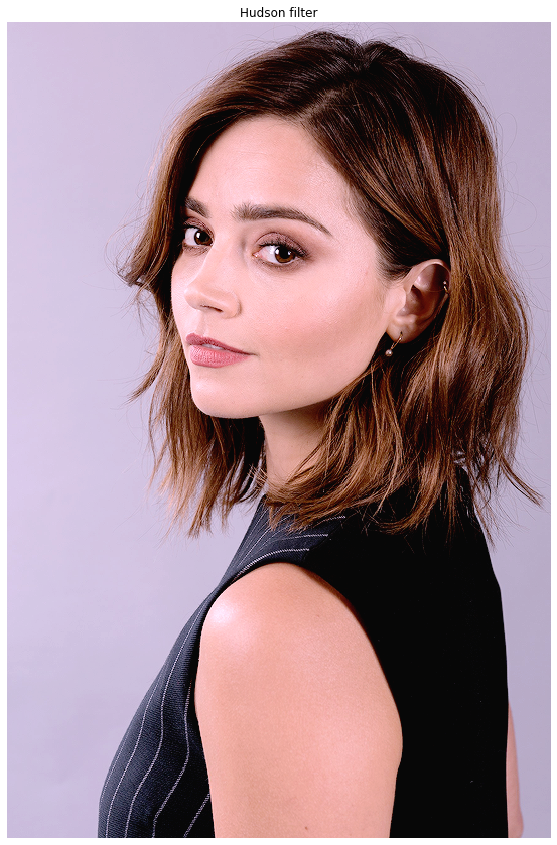

In [0]:
img = mpimg.imread('coleman.png')
cole = hudson_filter(img)
pltimg(cole, "Hudson filter")